# Transaction Monitoring Dashboard

This notebook visualizes transaction activity over time and highlights anomalies detected by the Isolation Forest model.  
We begin with an overview of active transaction types, followed by individual plots for each status to better understand their behavior.

---


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import load_transactions, aggregate_by_minute
from model import AnomalyDetector


## 1. Load and Prepare Data

We load the transaction data and aggregate it by minute and status.


In [9]:
df = load_transactions()
grouped = aggregate_by_minute(df)


## 2. Train the Anomaly Detection Model

We use Isolation Forest to learn the normal behavior across all transaction statuses.


In [10]:
detector = AnomalyDetector()
detector.fit(grouped)
anomalies = detector.predict(grouped)


## 3. Overview Plot: Active Transaction Types

We display only the statuses with significant activity (total count > 10) to reduce visual clutter.


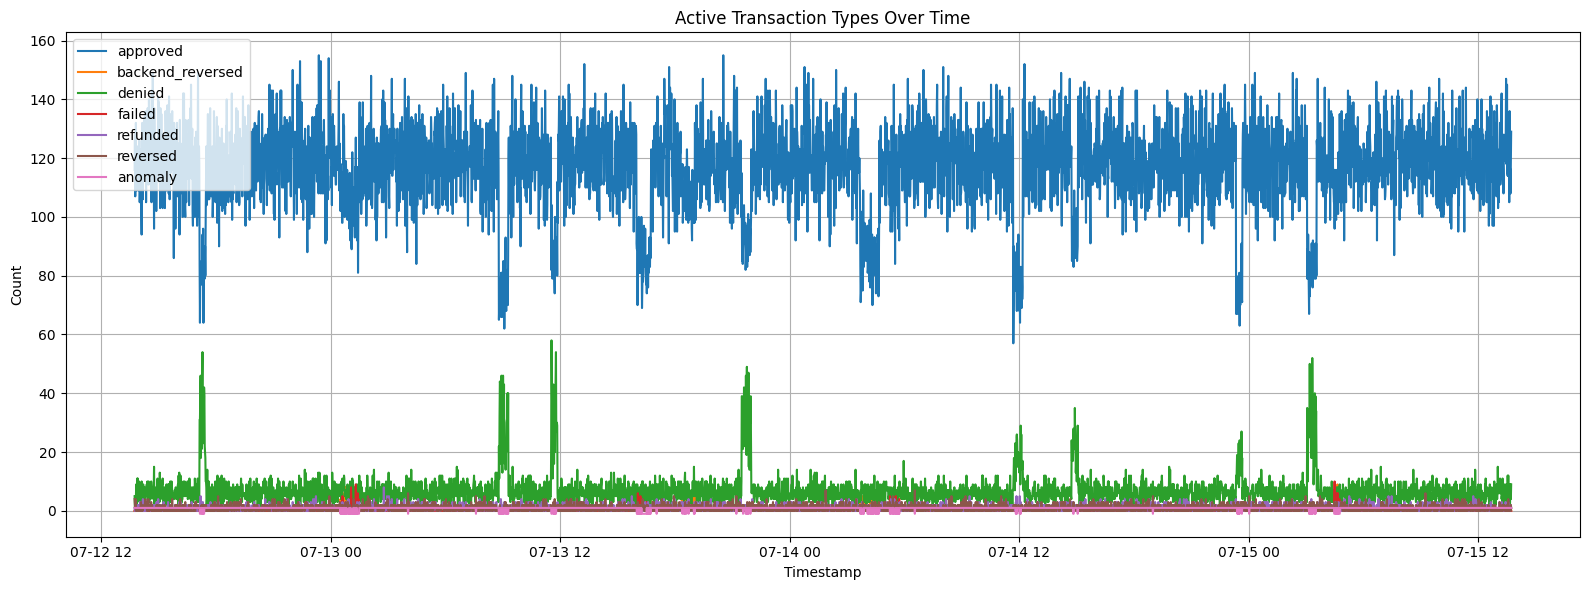

In [11]:
active_cols = [col for col in grouped.columns if col != 'timestamp' and grouped[col].sum() > 10]

plt.figure(figsize=(16, 6))
for col in active_cols:
    plt.plot(grouped['timestamp'], grouped[col], label=col)

plt.title('Active Transaction Types Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. Individual Status Plots with Anomaly Highlights

Each plot below focuses on a single transaction status, showing its behavior over time and highlighting detected anomalies.


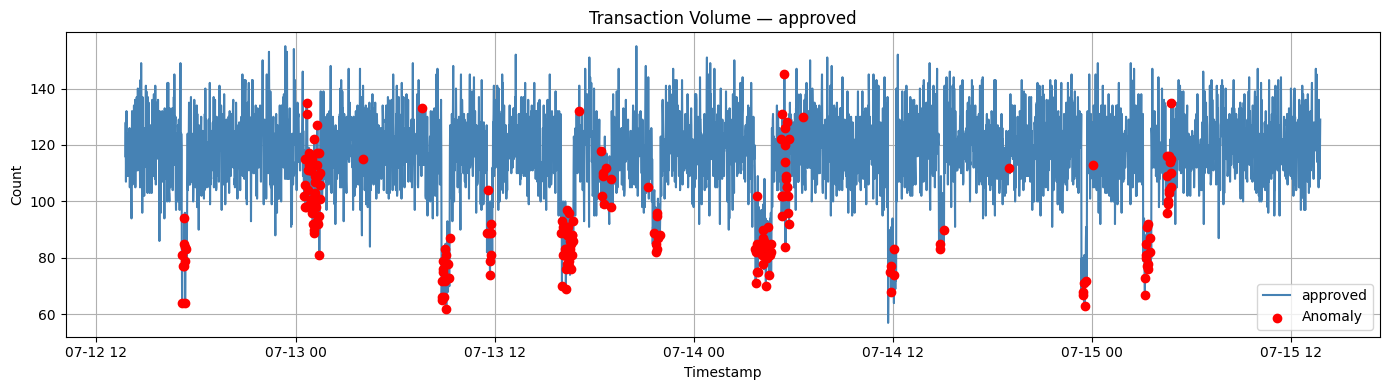

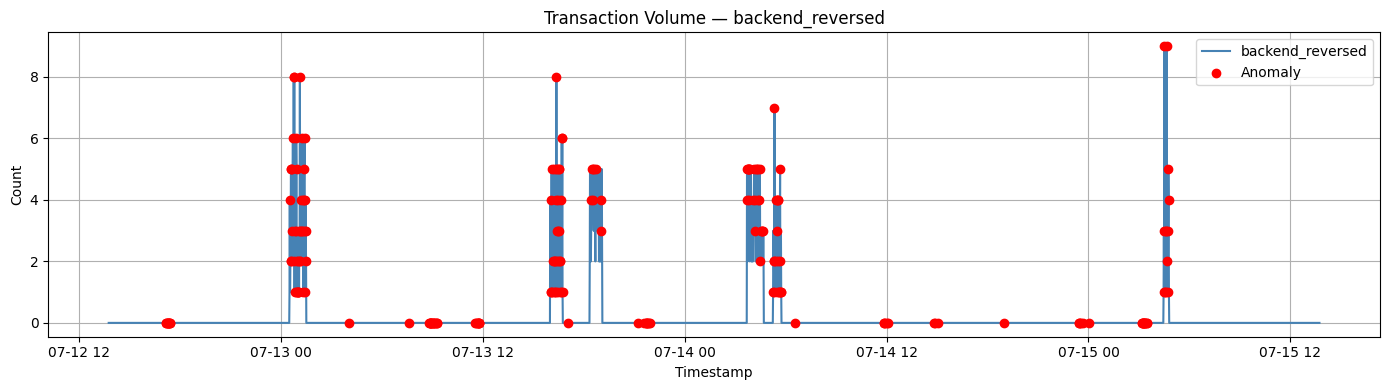

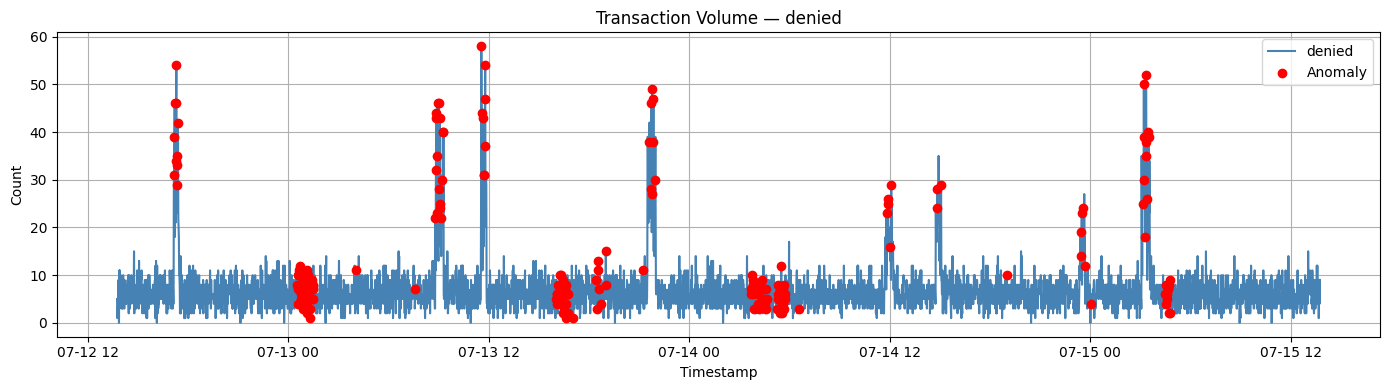

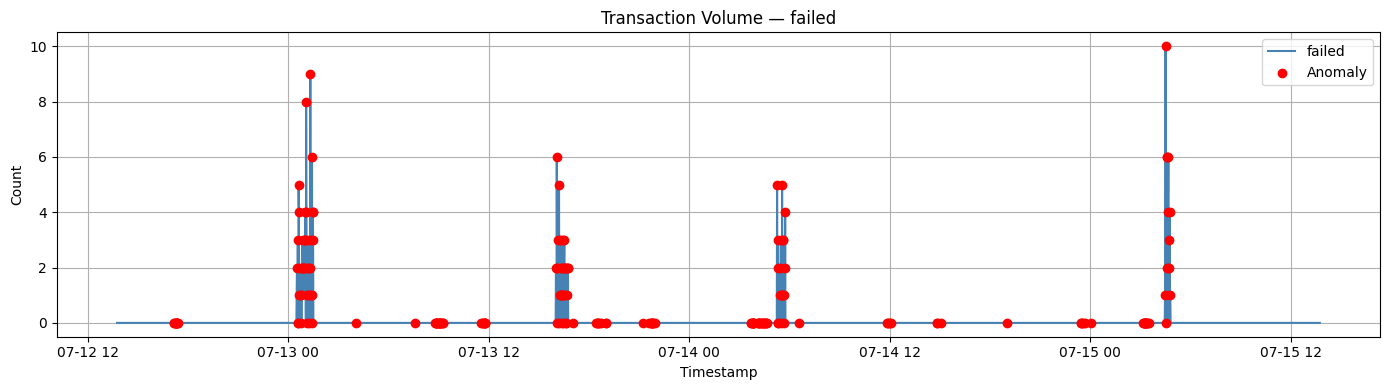

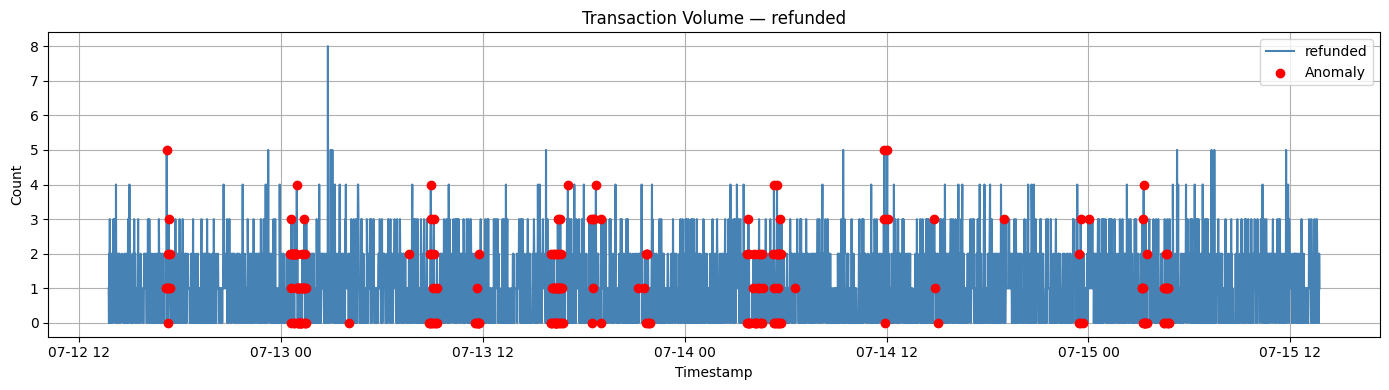

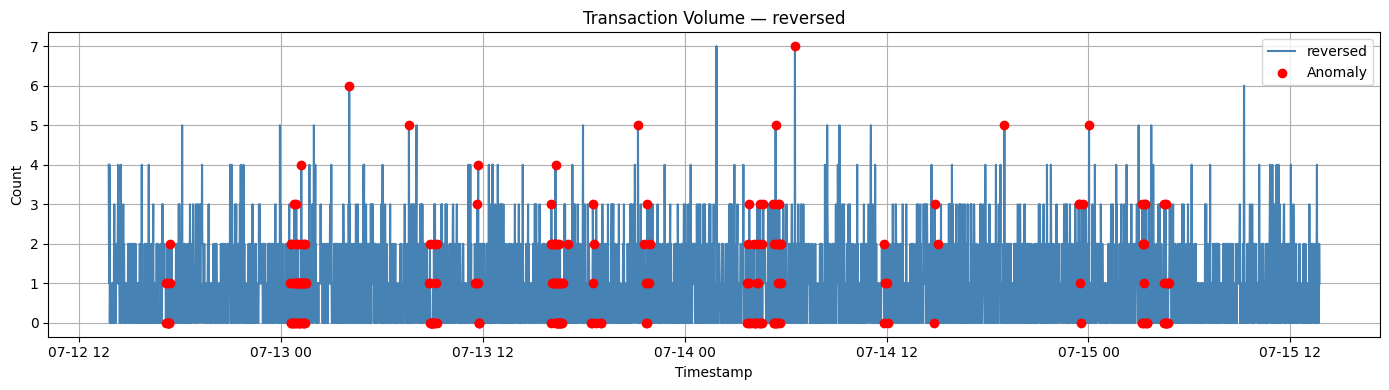

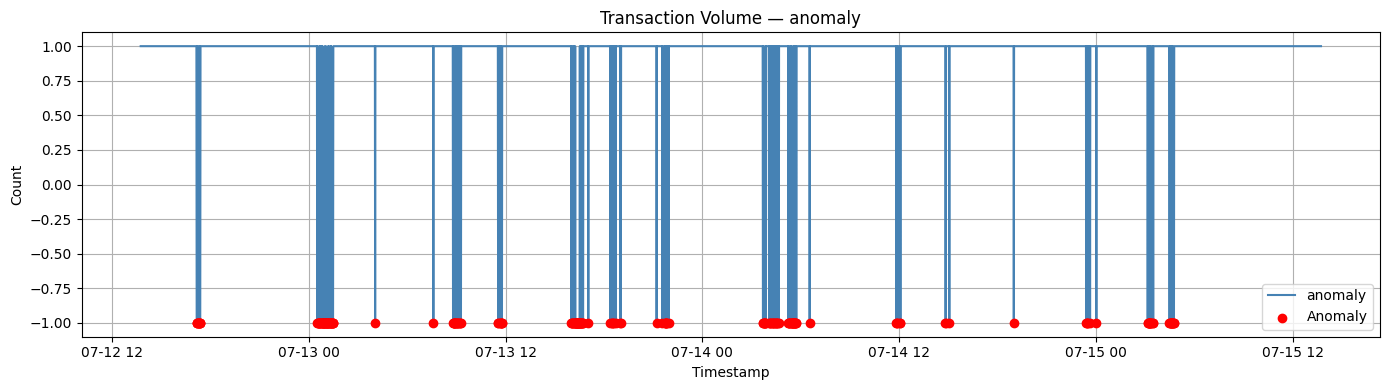

In [12]:
for col in active_cols:
    plt.figure(figsize=(14, 4))
    plt.plot(grouped['timestamp'], grouped[col], label=col, color='steelblue')
    if not anomalies.empty:
        plt.scatter(anomalies['timestamp'], anomalies[col], color='red', label='Anomaly', zorder=5)
    plt.title(f'Transaction Volume — {col}')
    plt.xlabel('Timestamp')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## ✅ Summary

- The model successfully learned patterns across all transaction types.
- Anomalies are highlighted in red for each status.
- This dashboard helps identify unusual spikes or drops in transaction activity.

You can extend this notebook by adding interactive filters, exporting anomaly logs, or integrating with real-time data streams.
